# DSCI 100: Individual Project Planning

## (1) Data Description

The PLAI group at UBC, using a MineCraft server, collected data about how people play video games through automated tracking and user-reported information. Two datasets were provided: `sessions.csv` and `players.csv`. **For flow, the code to load and calculate summary statistics for each dataset is written in section (3) Exploratory Data Analysis and Visualizations. This section is only for descriptions of data derived from the code output from section 3.**

### `sessions.csv` Overview

The `sessions.csv` dataset provides information about each game session played. There are 1535 observations and this dataset has 5 variables:

| Variable | Data type | Meaning |
| :------- | :------- | :------- |
| hashedEmail | Character | Anonymized identifier for each player's email |
| start_time | Character | Date (DD/MM/Year) and time of the start of each session |
| end_time | Character | Date (DD/MM/Year) and time of the end of each session |
| original_start_time | Double (Numeric) | Original start time of game session (UNIX time, milliseconds)
| original_end_time | Double (Numeric) | Original end time of game session (UNIX time, milliseconds)

There are potential problems in this dataset:
- In `start_time` and `end_time` columns, each cell contains both the date and the time, which makes this data untidy. 
- Without wrangling the data, it is difficult to tell how many sessions have been played by each player.
- This dataset contains redundant information; it contains the same information in two different formats (start and end time in both human-readable language and UNIX). Only one is needed.

#### Summary Statistics for `sessions.csv` Dataset

The mean duration of the sessions played is 3051.51 seconds.

### `players.csv` Overview

The `players.csv` dataset provides information about each player. There are 196 observations and the dataset contains 7 variables:

| Variable | Data type | Meaning |
| :------- | :------- | :------- |
| experience | Character | Experience level of the player |
| subscribe | Logical | Whether the player subscribed to a game-related newsletter |
| hashedEmail | Character | Anonymized identifier for each player's email |
| played_hours | Double (Numeric) | Total time spent playing for each player in hours |
| name | Character | Player name |
| gender | Character | Player gender |
| Age | Double (Numeric) | Player age in years |

Potential problems in this dataset are:
- The values in the `subscribe` variable column are of the logical data type, and are not very descriptive of what the data means. They could be changed to factor type and renamed to descrribe the status of a player's subscription.
- There are missing (NA) values for some observations in the `Age` variable; these need to be dealt with prior to gathering summary statistics.
- It's not clear how the data was collected, such as how player experience was gauged (self-reported? Other testing metrics?).
- `name` is not necessary, especially with `hashedEmail` as an identifier.

#### Summary Statistics for `players.csv` Dataset

The mean age of each player is 21.14 years, with a range from 9 to 58 years. The mean hours played per player is 5.90 hours, with a range of 0 to 223.1 hours. 

| Variable | Mean | Min | Max |
| :------- | :------- | :------- | :------- |
| Age (years) | 21.14 | 9 | 58 |
| Hours played per player | 5.90 | 0 | 223.1 |

## (2) Questions

The goal of this analysis is to answer the question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? 

To address this broader question, this analysis will use the data in the `players.csv` dataset to answer a more specific question: **Can age and the total hours played by a player predict whether they subscribe to a game-related newsletter?**

The `players.csv` dataset contains the data necessary to answer this specific question, formatted already into a table such that the explanatory variables, `played_hours` and `Age`, are in their own columns and can be analyzed to see if they can predict the response variable, `subscribe` (whether or not the player subscribes to the game-related newsletter). Each player is one observation in this dataset, so we can compare these variables for each player and see if the explanatory variables are good predictors.

I will wrangle the data by removing NA values.

## (3) Exploratory Data Analysis and Visualization

The first step is to load libraries and read in **both datasets** so that we can observe, obtain summary statistics, and describe them. **Descriptions and summary statistics obtained from exploratory analysis are written in section 1.**

In [1]:
#Loading libraries

library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)
# source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Reading in data from the sessions dataset

sessions_url <- "https://drive.google.com/uc?export=download&id=1IKREPSpI_p4vOLX-27uH4da9_LXLb4nO"

sessions_data <- read_csv(sessions_url)
sessions_data

#Reading in data from the players dataset

players_url <- "https://drive.google.com/uc?export=download&id=1wPawgc5uTyx2Btw3NTQR8VPvyRDrLwqT"

players_data <- read_csv(players_url)
players_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Tidying Data

The following section of code tidies the data so that it may be analyzed.

In [3]:
#Tidying data and removing rows with NA in order to analyze the data

#Obtaining UNIX time in seconds
sessions_data <- sessions_data |>
    mutate(original_end_time = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")),
           original_start_time = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")))

#Calculating mean session duration
sessions_duration <- sessions_data |>
    mutate(duration = original_end_time - original_start_time)
sessions_duration
             
#players dataset
#FALSE and TRUE values were changed to Unsubscribed and Subscribed to make the data more understandable
players_data <- players_data |>
                filter(!is.na(Age), !is.na(played_hours), !is.na(subscribe)) |>
                mutate(subscribe = as.factor(subscribe),
                       subscribe = recode(subscribe, "FALSE" = "Unsubscribed", "TRUE" = "Subscribed"))
players_data

hashedEmail,start_time,end_time,original_start_time,original_end_time,duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1719771120,1719771840,720
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1718667180,1718667960,780
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1721928840,1721930220,1380
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1722180960,1722182220,1260
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1721888100,1721888520,420
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1716171960,1716173100,1140


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Subscribed,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,Unsubscribed,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,Unsubscribed,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,Unsubscribed,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,Unsubscribed,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


### Summary Statistics Calculations

Descriptions of summary statistics are written in section 1. The code used to obtain them is below.

In [4]:
#As assignment parameters specified creating one table just for the mean, the table for minimum and maximums exist as a separate table. 

#Sessions dataset: Mean
mean_sessions_data <- sessions_duration |>
    select(duration) |>
    summarize(mean_duration = mean(duration, na.rm = TRUE))
mean_sessions_data

#Players dataset: Mean for each quantitative variable
mean_players_data <- players_data |>
    select(played_hours, Age) |>
    map_df(mean)
mean_players_data

#Players dataset: Min and max for each quantitative variable
max_min_players <- players_data |> 
    summarize(min_played_hours = min(played_hours),
              max_played_hours = max(played_hours),
              min_age = min(Age),
              max_age = max(Age))
max_min_players

mean_duration
<dbl>
3051.507


played_hours,Age
<dbl>,<dbl>
5.904639,21.13918


min_played_hours,max_played_hours,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,9,58


### Exploratory Visualizations

Since only the variables from the `players.csv` dataset are relevant to my question, only this dataset will be used for exploratory visualizations, as follows.

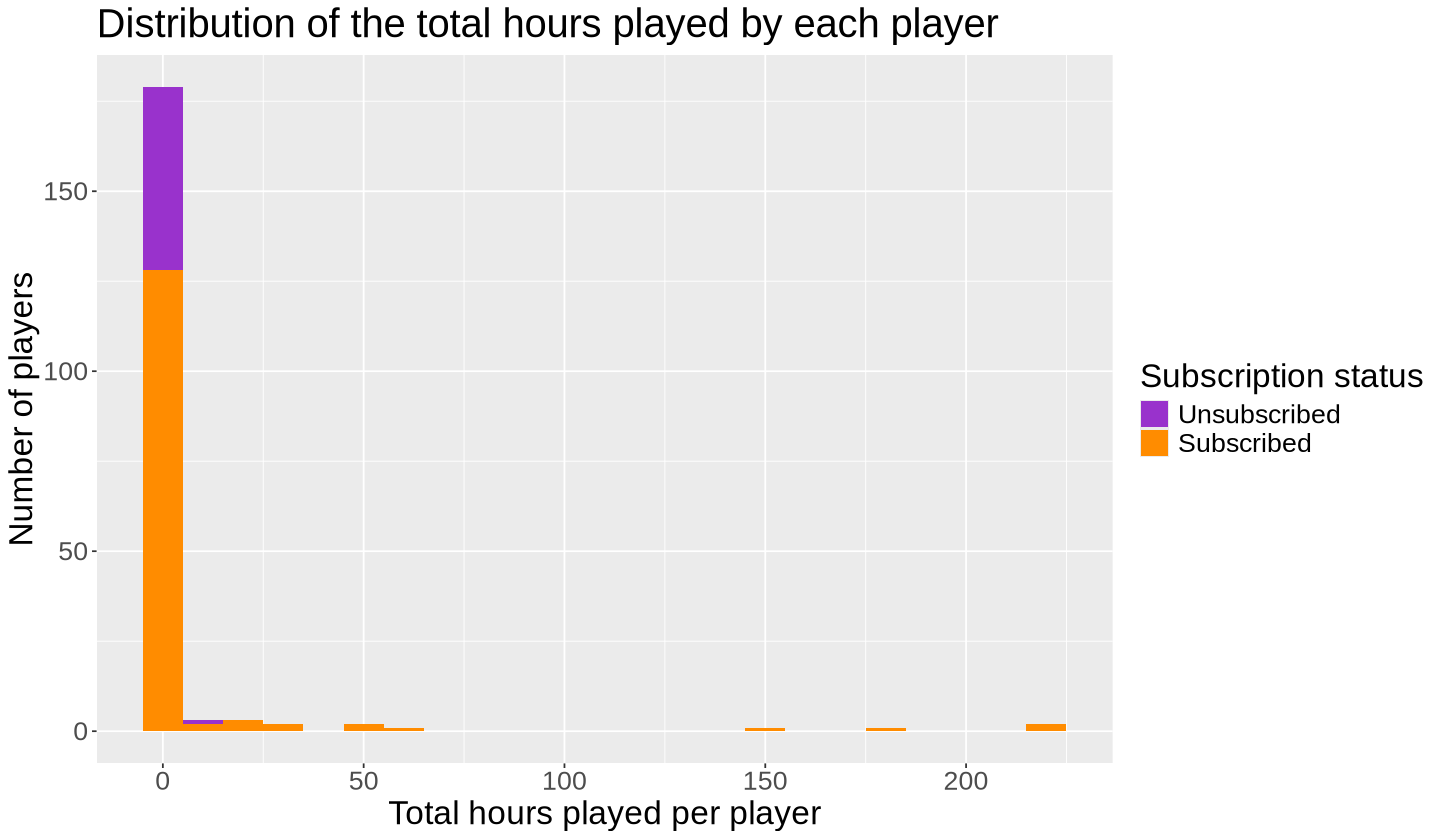

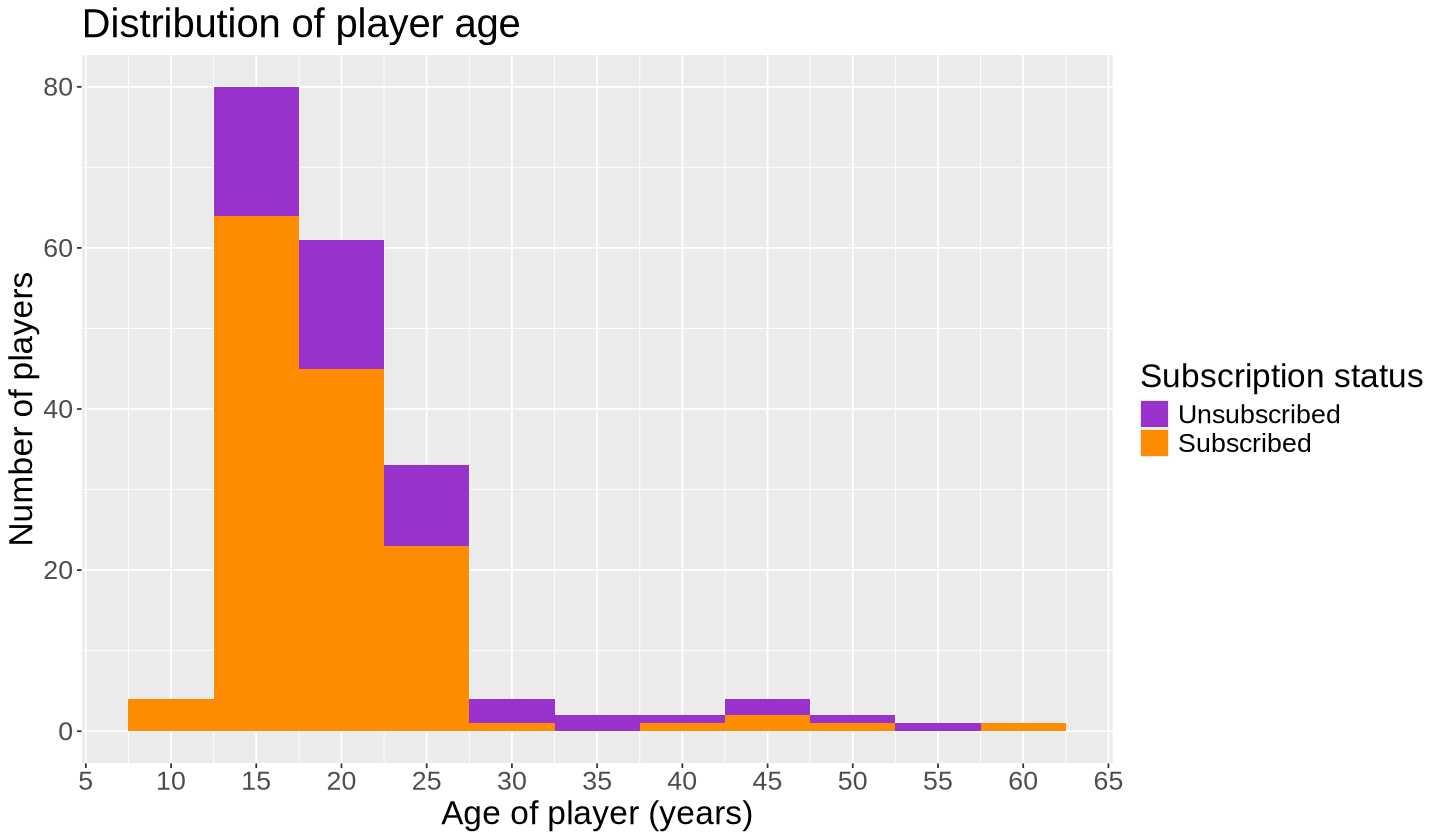

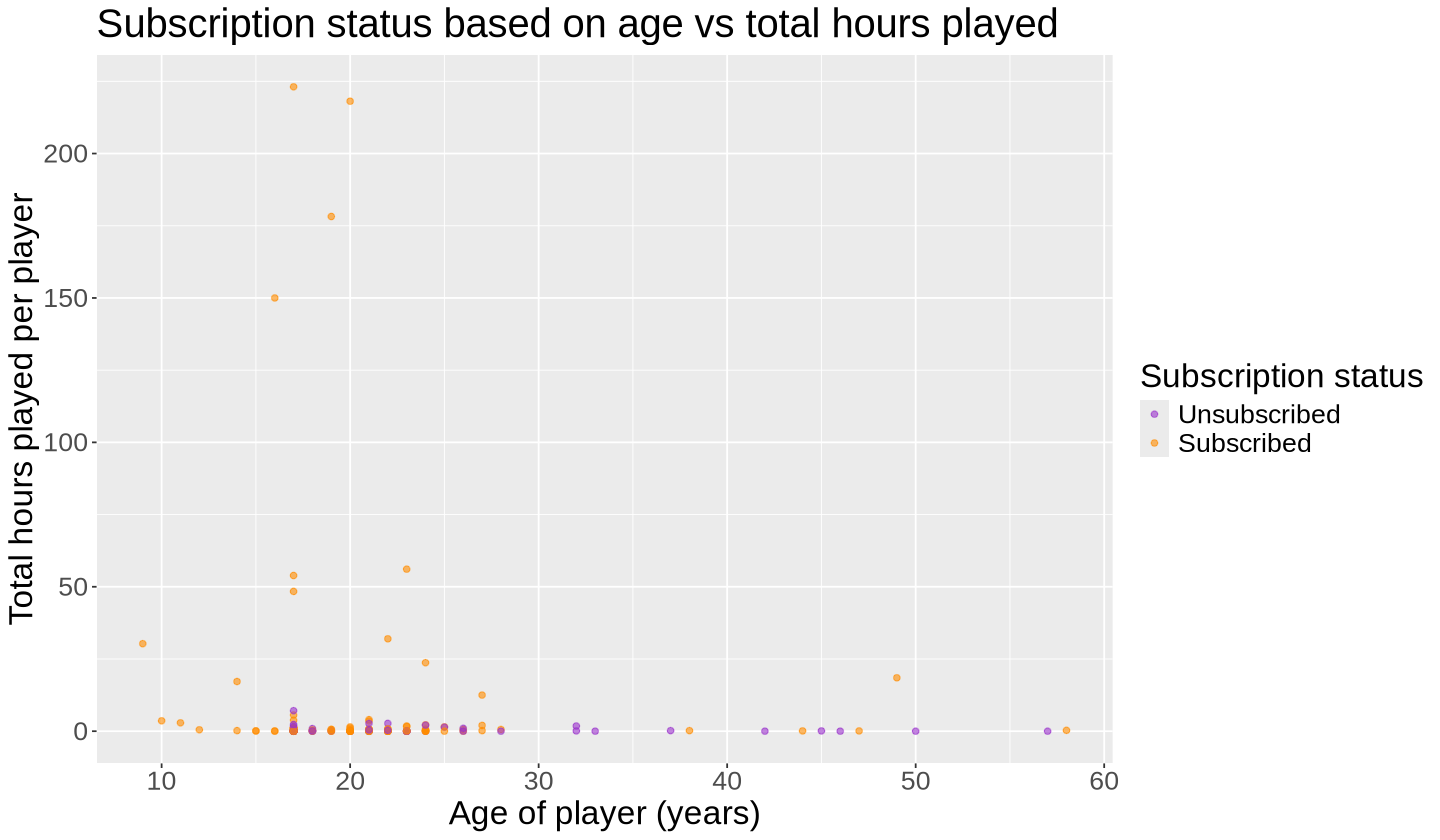

In [5]:
options(repr.plot.width = 12)

played_hours_histogram <- players_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 10, position = "stack") +
    labs(x = "Total hours played per player",
         y = "Number of players",
         title = "Distribution of the total hours played by each player",
         fill = "Subscription status") +
    scale_fill_manual(values = c("Unsubscribed" = "darkorchid", "Subscribed" = "darkorange")) +
    theme(text = element_text(size = 20))
played_hours_histogram


age_histogram <- players_data |> 
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 5, position = "stack") +
    labs(x = "Age of player (years)",
         y = "Number of players",
         title = "Distribution of player age",
         fill = "Subscription status") +
    scale_x_continuous(breaks = seq(0, 70, by = 5)) +
    scale_fill_manual(values = c("Unsubscribed" = "darkorchid", "Subscribed" = "darkorange")) +
    theme(text = element_text(size = 20))
age_histogram

age_vs_played_hours <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.6) +
    labs(x = "Age of player (years)",
         y = "Total hours played per player",
         title = "Subscription status based on age vs total hours played",
         color = "Subscription status") +
    scale_color_manual(values = c("Unsubscribed" = "darkorchid", "Subscribed" = "darkorange")) +
    theme(text = element_text(size = 20))
age_vs_played_hours

### Insights from the Visualizations

The plot showing distribution of total hours played per player shows that the majority of users played <50 hours. No unsubscribed players played more than 25 hours.

The plot showing distribution of age shows that the majority of players are 15-25 years old.

Both histograms show that there are more players that are subscribed than unsubscribed.

The scatterpoint indicates that there is no relationship between age and total hours played. Also, most users have not played more than 50 hours, but of the ones that do, all have subscribed. Individuals that have played a lot of hours tend to be subscribed and also younger -- no one over the age of 30 has played more than 25 hours. These, especially hours played, are potential predictors for subscription status.

## (4) Methods and Plan

I plan on using K-nearest neighbors classification on the `players.csv` dataset, and is an appropriate approach since I am using two predictors (`Age` and `hours_played`) to predict a categorical response variable (`subscribe`, which is player subscription status). KNN classification doesn't make assumptions about data shape/patterns, as it simply uses observations around the new observation to make a prediction based on their majority classification, so it's a method we can apply here.

A limitation in KNN classification is that in datasets where the response categories are not balanced, ie many more subscribed than unsubscribed players, it will be biased and more likely to categorize observations as subscribed. It is also not good at predicting data beyond the range of values used to create the model.

I will split the dataset into training and testing datasets by setting a 75-25% split, respectively. Then, I will create a recipe and scale predictors, create a classifier using training data, and fit the model onto the training set. I will use a 5-fold cross validation (with training and validation sets) to compare and select the best k value with highest estimated prediction accuracy for the training set. I will retrain the model using this k value, then test it on testing data to evaluate prediction accuracy.

## (5) GitHub Repository

https://github.com/katelynteng/project_planning